## Übung zu Kapitel 4

In der ersten praktischen Übung geht es darum, selbst einige Daten zu erkunden. Hierzu benutzen wir wieder die Bostondaten, die wir vorher schon in diesem Kapitel verwendet haben.

### Deskriptive Statistiken

Untersuchen Sie die Bostondaten mithilfe von deskriptiven Statistiken. Berechnen Sie die Lage durch das arithmetische Mittel und den Median, die Variabilität durch die Standardabweichung und den IQR sowie die Datenbereiche der Merkmale. Das Ziel dieser Aufgabe ist aber nicht die Berechnung dieser Werte, sondern ihre Interpretation. Überlegen Sie sich zum Beispiel, was man über das Merkmal `CRIM` über das arithmetische Mittel und den Median lernt.

In [1]:
import pandas as pd
from sklearn import datasets

# first we load the data and print description
boston = datasets.load_boston()
print(boston.DESCR)

# please note that this data set will be removed from scikit-learn in version 1.2
# afterwards, you can load the data with the following code:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

# we convert the data into a data frame and use the convenient describe function from pandas
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.describe()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Das arithmetische Mittel von `CRIM` ist deutlich größer als der Median (Zeile 50%). Zusammen mit dem sehr großen Wert ist dies ein starker Indikator, dass die Verteilung nicht symmetrisch um das arithmetische Mittel verteilt ist und es einen langen rechten "Tail" gibt. Da der Median außerdem noch sehr nah am Minimum liegt, folgt das viele Daten in einem sehr kleinen Wertebereich der Verteilung liegen. Zusammen mit der Dokumentation der Daten folgt also, dass es viele Gebiete mit einer niedrigen Kriminalitätsrate gibt.

### Visualisierungen einzelner Merkmale

Schauen Sie sich die Merkmale `ZN` und `INDUS` mithilfe von Histogrammen und Densityplots (mit und ohne Rug) an. Was lernen Sie über diese Daten? Was sind die Vor- und Nachteile der verschiedenen Visualisierungen?

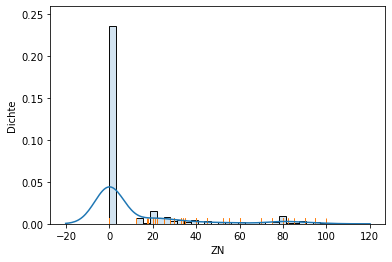

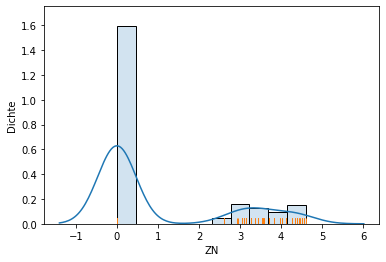

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots()
sns.histplot(boston_df['ZN'], stat='density', alpha=0.2, ax=ax)
sns.kdeplot(boston_df['ZN'], ax=ax)
sns.rugplot(boston_df['ZN'], ax=ax)
ax.set_xlabel('ZN')
ax.set_ylabel('Dichte')
plt.show()

# we also plot the logarithm of the data
fig, ax = plt.subplots()
sns.histplot(np.log1p(boston_df['ZN']), stat='density', alpha=0.2, ax=ax)
sns.kdeplot(np.log1p(boston_df['ZN']), ax=ax)
sns.rugplot(np.log1p(boston_df['ZN']), ax=ax)
ax.set_xlabel('ZN')
ax.set_ylabel('Dichte')
plt.show()

Über das Merkmal `ZN` lernt man unter anderem:

- Die meisten Werte von `ZN` sind null. Im Histogramm kann man dies nur vermuten, der Rug sagt dies aber eindeutig aus. 
- Die restlichen Werte sind über den kompletten Datenbereich verteilt, welcher relativ dünn besiedelt ist (engl. *sparse*). 
- Wenn man die Daten logarithmiert sieht man, dass die Daten, die ungleich null sind, in etwa einer Lognormal-Verteilung folgen. 

Hieraus kann man ableiten, dass es eine rein industrielle Gebiete gibt (`ZN` ist null), es aber nahezu keinen einen Wohngebiete gibt (`ZN` ist 100).

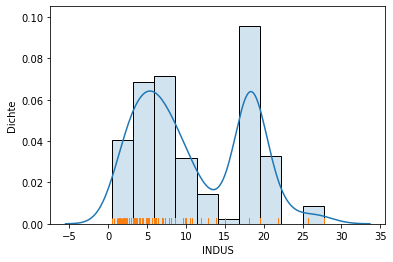

In [9]:
fig, ax = plt.subplots()
sns.histplot(boston_df['INDUS'], stat='density', alpha=0.2, ax=ax)
sns.kdeplot(boston_df['INDUS'], ax=ax)
sns.rugplot(boston_df['INDUS'], ax=ax)
ax.set_xlabel('INDUS')
ax.set_ylabel('Dichte')
plt.show()

Über das Merkmal `INDUS` lernt man unter anderem:

- Die Daten sind vermutlich bimodal, also eine Mischung aus zwei Verteilungen: Es scheint eine Normalverteilung mit einem Mittel von etwa fünf zu geben, und eine weitere Verteilung für Werte größer 15. Die größeren Werte sind möglichweise exponentiell verteilt. 

Mithilfe der Definition von `INDUS` folgt, dass es Gebiete mit relativ wenig Industrie gibt, die nicht der Einzelhandel ist und Regionen in denen die Industrie deutlich stärker als der Einzelhandel vertreten ist. Im Sinne der Definition von `INDUS` schließt der Begriff Industrie auch Büroarbeitsplätze ein. 

Wenn man die Vor- und Nachteile der Visualisierungen betrachtet, bemerkt man das Folgende:

- Ohne den Rug erkennt man nicht gut, wenn viele Werte wirklich exakt gleich sind.
- Der Densityplot von `INDUS` deutet darauf hin, dass es eventuell eine zweite Normalverteilung für größere Werte geben könnte. Das wird jedoch vom Histogramm und dem Rug nicht unterstützt. 
- Der Densityplot von `INDUS` hilft, die Normalverteilung für die kleineren Werte zu erkennen. 

Insgesamt fällt auf, dass sich die Stärken und Schwächen der Diagrammtypen ergänzen. 

### Paarweise Beziehungen

Betrachten Sie die paarweisen Beziehungen der Bostondaten. Benutzen Sie hierfür Scatterplots und eine Korrelations-Heatmap. Was lernen Sie über die Beziehungen aus den Daten? Beachten Sie hierbei insbesondere auch, ob Sie ethisch problematische Eigenschaften finden.

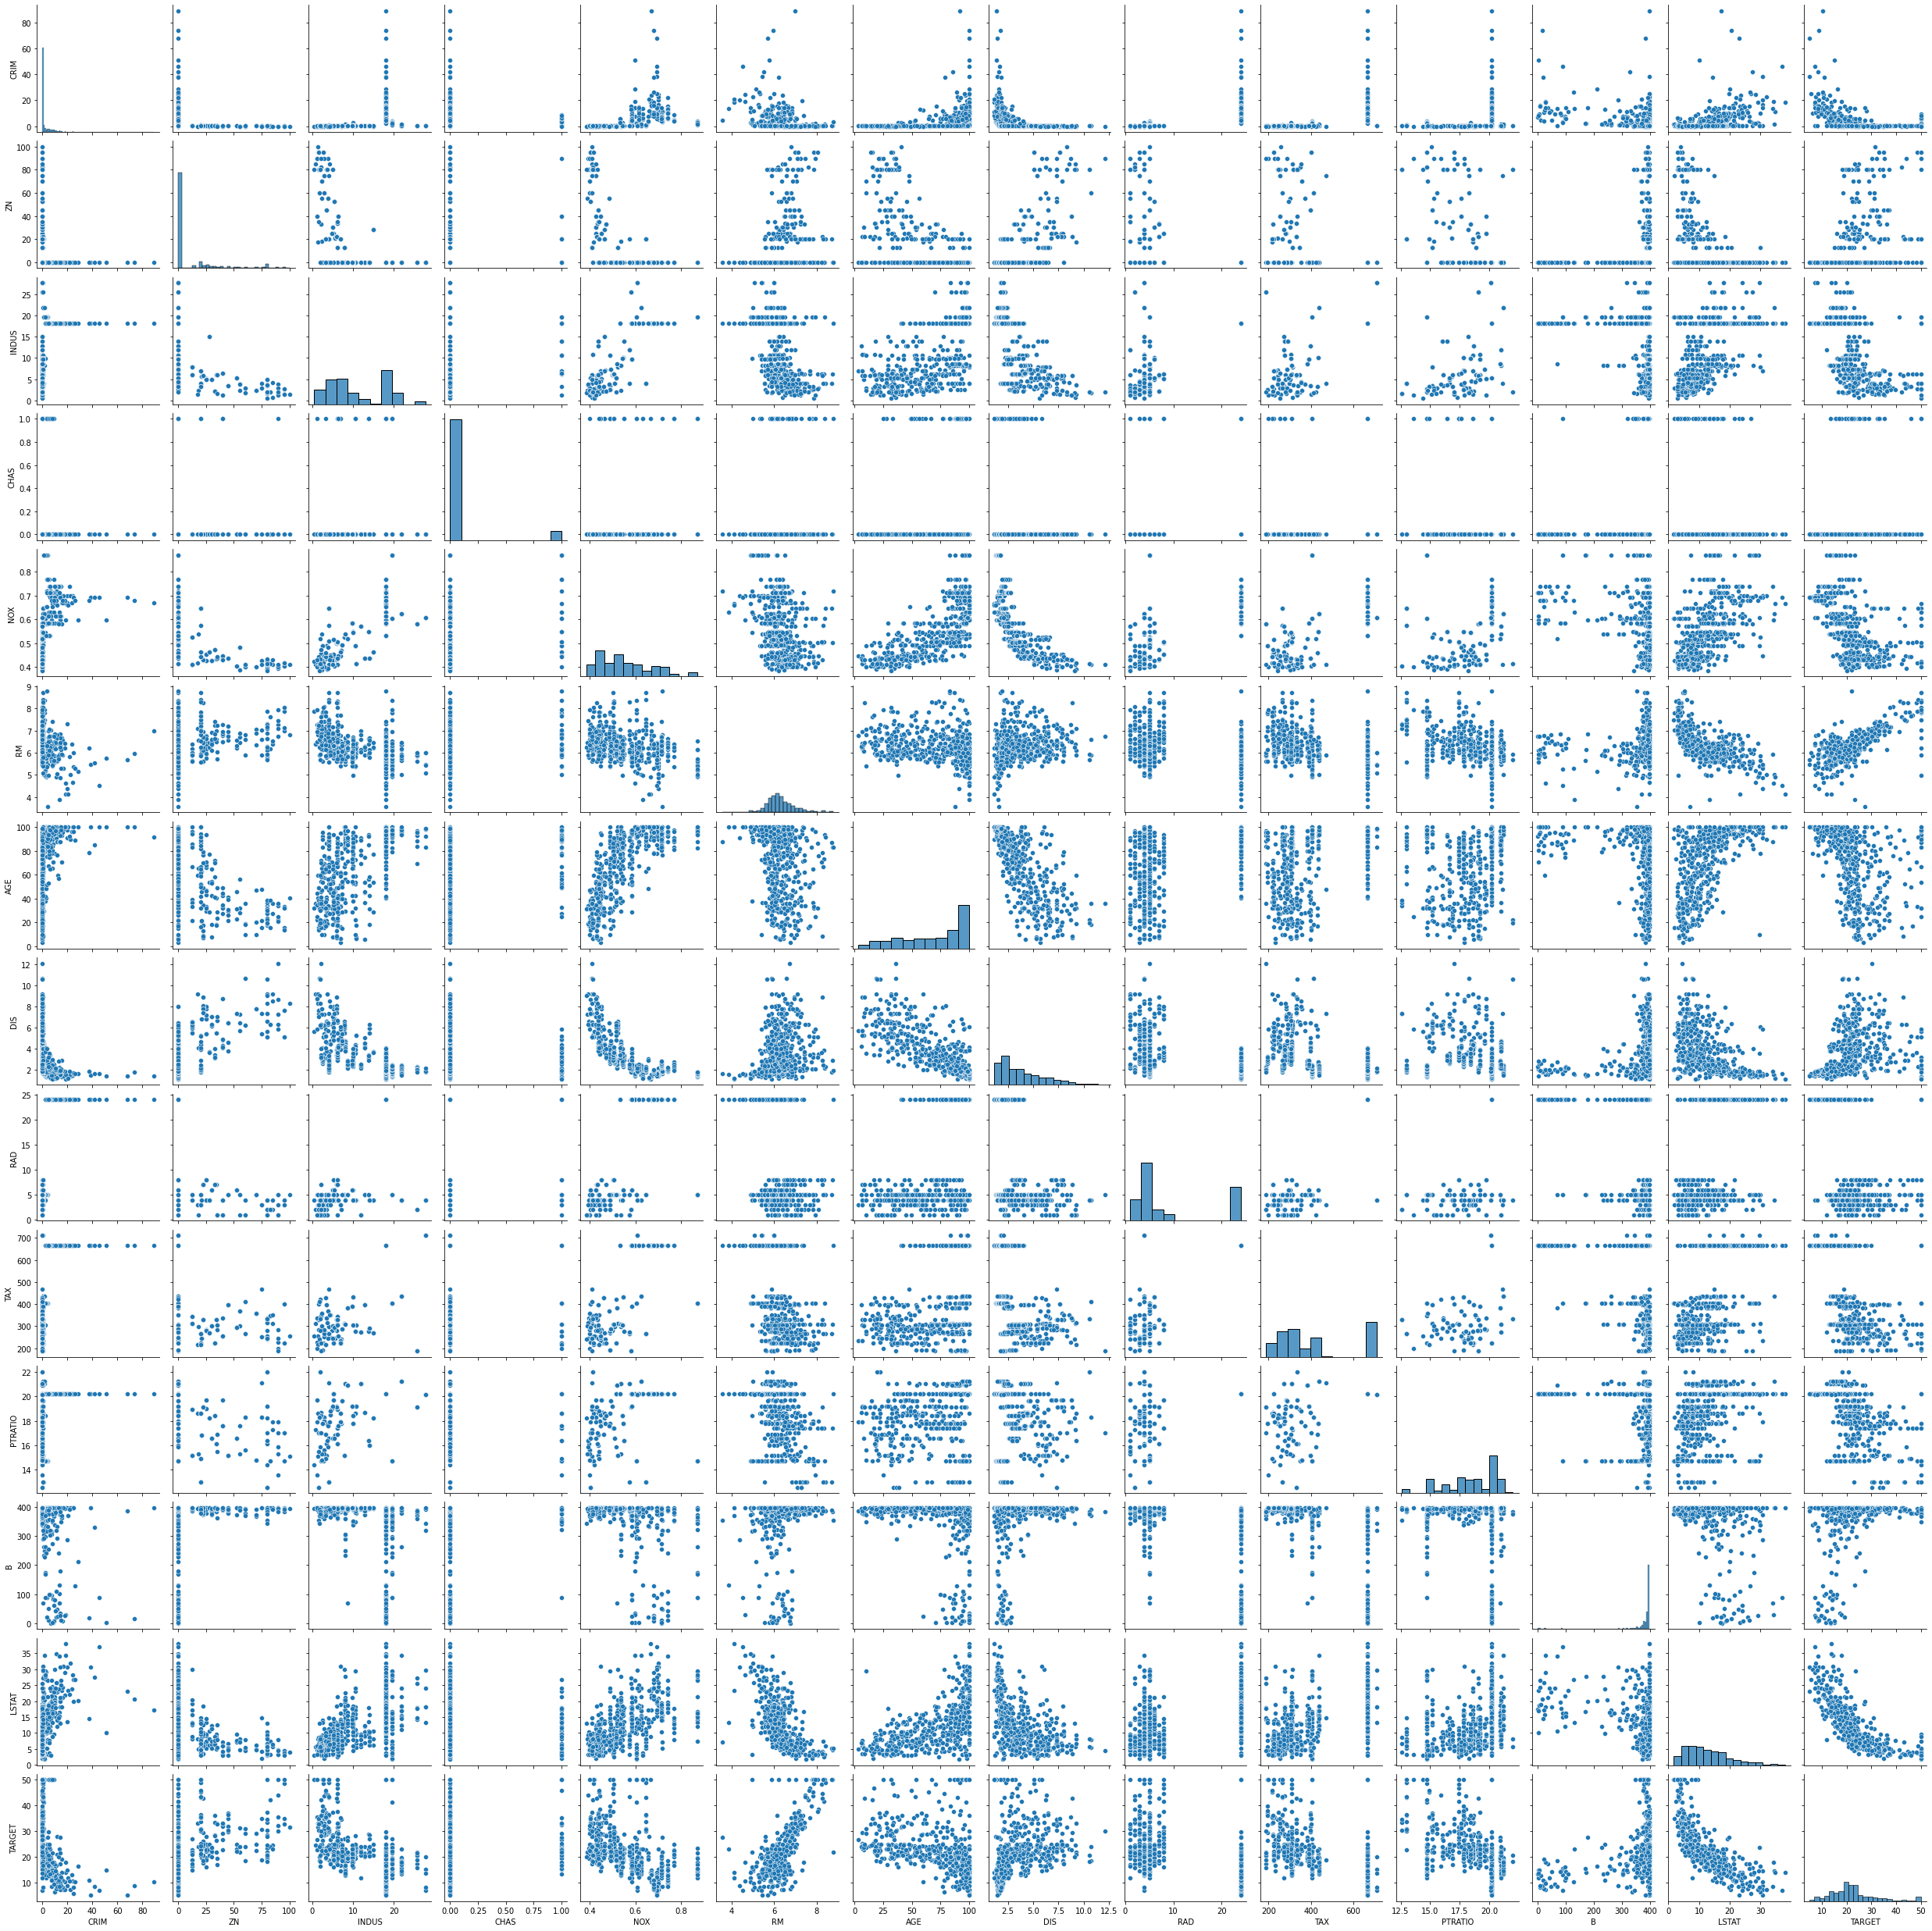

In [10]:
# we need to add the target as the fourtenths feature to the data frame
boston_df['TARGET'] = boston.target
# the rest is automatically done by seaborns powerful pairplot function
sns.pairplot(boston_df)
plt.show()

Hier sind einige Erkenntnisse aus den paarweisen Plots:
- Es scheint negative Korrelationen zwischen einigen Paaren von Merkmalen zu geben: `CRIM` und `TARGET`, `DIS` und `INDUS`, `DIS` und `NOX`, `LSTAT` und `RM`, `LSTAT` und `TARGET`, `DIS` und `AGE`. 
- Es scheint positive Korrelationen zwischen einigen Paaren von Merkmalen zu geben: `DIS` und `ZN`, `NOX` und `INDUS`, `PTRATIO` und `INDUS`, `AGE` und `NOX`, `TAX` und `NOX`, `RM` und `TARGET`. 
- Es scheint noch einige schwache Korrelationen zu geben, genaue Rückschlüsse geben die Daten aber nicht her. Viele Beziehungen sehen eher zufällig aus, zum Beispiel `PTRATIO` und `AGE`. 
- Man kann aus den zusammenhängen Rückschlüsse ziehen, zum Beispiel: Gebiete mit einer hohen Grundsteuer haben tendenziell mehr Industrieanteile, eine hohe Stickstoffbelastung und dass die Stickstoffbelastung sich mit Abstand dieser Bereiche reduziert. Diese Rückschlüsse sind aber mit Vorsicht zu genießen und benötigen weitere Analysen um kausale Zusammenhänge abzuleiten. 

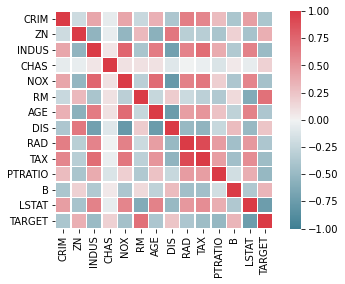

In [11]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(boston_df.corr(), square=True, linewidths=.5, 
            vmin=-1.0, vmax=1.0, cmap=cmap, annot=False)
plt.show()

Die Korrelations-Heatmap bestätigt im Wesentlichen die Analyse der Scatterplots bezüglich der Korrelationen. Ein Vorteil der Heatmap ist jedoch das diese Information kompakter dargestellt wird. Hierdurch fällt zum Beispiel auf, dass es eine relativ starke Korrelation zwischen `B` und `TARGET` gibt. Mit anderen Worten, zwischen dem Anteil der schwarzen Bevölkerung und den Hauspreisen. Dies ist auch der Grund, weshalb die Bostondaten aus scikit-learn entfernt wurden: Es handelt sich um offensichtlichen Rassismus in den Daten. Hier betrachten wir diese Daten denoch, um Sensitivität für derartige Probleme zu schaffen. 